# Drowsiness Detection System

- Drowsy Driving is a deadly combination of driving and sleepiness.

- The number of road accidents due to Drowsy Driving is increasing at an alarming rate worldwide.

- Not having a proper sleep is the main reason behind drowsiness while driving. However, other reasons like sleep disorders, medication, alcohol consumption, or driving during night shifts can also cause drowsiness while driving.


# Loading data and libraries

In [ ]:
!pip install opencv-python

In [ ]:
import sys
print(sys.executable)


/usr/bin/python3


In [ ]:
!pip uninstall numpy mediapipe -y



Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: mediapipe 0.10.21
Uninstalling mediapipe-0.10.21:
  Successfully uninstalled mediapipe-0.10.21


In [ ]:

!pip install numpy mediapipe


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl (35.6 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, 

In [ ]:
!pip install mediapipe --upgrade
!pip install numpy --upgrade
!pip install pandas --upgrade



  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 35.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.2.5 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.19.0 which is incompa

In [ ]:
!pip install --force-reinstall numpy mediapipe pandas matplotlib

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.7 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached protobuf-4.25.7-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached sounddevice-0.5.1-py3-none-any.whl.metadata (1.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 6.7 MB/s eta 0:00:00
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.0 MB/s eta 0:00:00
Using cached mediapipe-0.10.21-cp311-cp311-manylinux_2_28_x86_64.whl

In [ ]:
!pip install mediapipe
import pandas as pd
import numpy as np
import mediapipe as mp
import os
import shutil
import matplotlib.pyplot as plt
import mediapipe as mp

mp_facemesh = mp.solutions.face_mesh
mp_drawing  = mp.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates

%matplotlib inline

/usr/local/lib/python3.11/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.5.1 is installed, but it is not compatible with the installed jaxlib version 0.6.0, so it will not be used.
  warnings.warn(


In [ ]:
import os

# Check if the directory exists before creating it
if not os.path.exists('./Fatigue Subjects'):
    os.makedirs('./Fatigue Subjects')

# Check if the directory exists before creating it
if not os.path.exists('./Active Subjects'):
    os.makedirs('./Active Subjects')

# Image preprocessing :
### our preprocessing will include
- Detecting faces from images
- Drawing landmarks on our images to increase performance
- Resizing our images
- LabelEncoding
- Image Augmantation

# Landmarks :
We will use mediapipe to draw landmarks on our images after detecting faces and croping them

In [ ]:
# Landmark points corresponding to left eye
all_left_eye_idxs = list(mp_facemesh.FACEMESH_LEFT_EYE)
# flatten and remove duplicates
all_left_eye_idxs = set(np.ravel(all_left_eye_idxs))

# Landmark points corresponding to right eye
all_right_eye_idxs = list(mp_facemesh.FACEMESH_RIGHT_EYE)
all_right_eye_idxs = set(np.ravel(all_right_eye_idxs))

# Combined for plotting - Landmark points for both eye
all_idxs = all_left_eye_idxs.union(all_right_eye_idxs)

# The chosen 12 points:   P1,  P2,  P3,  P4,  P5,  P6
chosen_left_eye_idxs  = [362, 385, 387, 263, 373, 380]
chosen_right_eye_idxs = [33,  160, 158, 133, 153, 144]
all_chosen_idxs = chosen_left_eye_idxs + chosen_right_eye_idxs

In [ ]:
IMG_SIZE=145
i=0
def draw(
    *,n=i,
    img_dt,cat,
    img_eye_lmks=None,
    img_eye_lmks_chosen=None,
    face_landmarks=None,
    ts_thickness=1,
    ts_circle_radius=2,
    lmk_circle_radius=3,
    name="1",
):

    image_drawing_tool = img_dt


    image_eye_lmks = img_dt.copy() if img_eye_lmks is None else img_eye_lmks


    img_eye_lmks_chosen = img_dt.copy() if img_eye_lmks_chosen is None else img_eye_lmks_chosen


    connections_drawing_spec = mp_drawing.DrawingSpec(
        thickness=ts_thickness,
        circle_radius=ts_circle_radius,
        color=(255, 255, 255)
    )


    # Draw landmarks on face using the drawing utilities.
    mp_drawing.draw_landmarks(
        image=image_drawing_tool,
        landmark_list=face_landmarks,
        connections=mp_facemesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=connections_drawing_spec,
    )


    landmarks = face_landmarks.landmark



    for landmark_idx, landmark in enumerate(landmarks):
        if landmark_idx in all_idxs:
            pred_cord = denormalize_coordinates(landmark.x,
                                                landmark.y,
                                                imgW, imgH)
            cv2.circle(image_eye_lmks,
                       pred_cord,
                       lmk_circle_radius,
                       (255, 255, 255),
                       -1
                       )

        if landmark_idx in all_chosen_idxs:
            pred_cord = denormalize_coordinates(landmark.x,
                                                landmark.y,
                                                imgW, imgH)
            cv2.circle(img_eye_lmks_chosen,
                       pred_cord,
                       lmk_circle_radius,
                       (255, 255, 255),
                       -1
                       )

    if cat=='Fatigue Subjects':
        cv2.imwrite(str('./Fatigue Subjects/'+str(n)+'.jpg'), image_drawing_tool)
    else:
        cv2.imwrite(str('./Active Subjects/'+str(n)+'.jpg'), image_drawing_tool)

    resized_array = cv2.resize(image_drawing_tool, (IMG_SIZE, IMG_SIZE))
    return resized_array

In [ ]:
imgH, imgW, _=0,0,0
def landmarks(image,category,i):
    resized_array=[]
    IMG_SIZE = 145
    image = np.ascontiguousarray(image)
    imgH, imgW, _ = image.shape

     # Running inference using static_image_mode
    with mp_facemesh.FaceMesh(
        static_image_mode=True,         # Default=False
        max_num_faces=1,                # Default=1
        refine_landmarks=False,         # Default=False
        min_detection_confidence=0.5,   # Default=0.5
        min_tracking_confidence= 0.5,) as face_mesh:

        results = face_mesh.process(image)

        # If detections are available.
        if results.multi_face_landmarks:
            for face_id, face_landmarks in enumerate(results.multi_face_landmarks):
                resized_array= draw(img_dt=image.copy(), cat=category, n=i,face_landmarks=face_landmarks)
    return resized_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
import glob
import xml.etree.ElementTree as ET


image_files = glob.glob("D:\Spl Project\0 FaceImages")
data = []

for img_path in image_files:
    img = Image.open(img_path).convert("L")
    img_array = np.array(img).flatten()  # Flatten image
    data.append(img_array)


df = pd.DataFrame(data)

def df_to_xml(df, root_name="images", row_name="image"):
    root = ET.Element(root_name)

    for i, row in df.iterrows():
        item = ET.SubElement(root, row_name, id=str(i))
        for j, value in enumerate(row):
            ET.SubElement(item, f"pixel{j}").text = str(value)

    return ET.tostring(root, encoding="utf-8").decode()


xml_output = df_to_xml(df)


with open("output.xml", "w", encoding="utf-8") as f:
    f.write(xml_output)

print("XML file saved as output.xml")


XML file saved as output.xml


In [ ]:
with open("/content/drive/MyDrive/spl project/haarcascade_frontalface_default.xml") as f:
    print("File read successfully!")


File read successfully!


In [ ]:
import os

base_path = r"C:\spl project\0 FaceImages"  # Adjust if needed
if os.path.exists(base_path):
    print("Folders in", base_path, ":", os.listdir(base_path))
else:
    print("Base directory does not exist:", base_path)


Base directory does not exist: C:\spl project\0 FaceImages


In [ ]:
import os
import cv2

def face_for_yawn(direc="/content/drive/MyDrive/spl project/0 FaceImages",
                  face_cas_path=r"/content/drive/MyDrive/spl project/haarcascade_frontalface_default.xml"):
    yaw_no = []
    i = 1
    IMG_SIZE = 145
    categories = ["Fatigue Subjects", "Active Subjects"]


    if not os.path.exists(face_cas_path):
        raise FileNotFoundError(f"Face cascade file not found: {face_cas_path}")

    face_cascade = cv2.CascadeClassifier(face_cas_path)

    total_images = 0
    image_paths = []


    valid_extensions = (".jpg", ".jpeg", ".png", ".bmp")
    for category in categories:
        path_link = os.path.join(direc, category)
        if not os.path.exists(path_link):
            print(f"Warning: Directory not found: {path_link}")
            continue
        for image in os.listdir(path_link):
            if image.lower().endswith(valid_extensions):
                image_paths.append((category, os.path.join(path_link, image)))

    total_images = len(image_paths)
    print(f"Total images to process: {total_images}")

    for idx, (category, image_path) in enumerate(image_paths, start=1):
        class_num1 = categories.index(category)
        print(f"[{idx}/{total_images}] Processing image: {os.path.basename(image_path)} (Category: {category})")

        image_array = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_array is None:
            print(f"Warning: Unable to read image {image_path}")
            continue

        faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
        for (x, y, w, h) in faces:
            img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
            roi_color = img[y:y+h, x:x+w]

            if 'landmarks' in globals():
                land_face_array = landmarks(roi_color, category, i)
                yaw_no.append([land_face_array, class_num1])
                i += 1
            else:
                print("Error: landmarks function is not defined.")

        print(f"Completed: {idx}, Remaining: {total_images - idx}")

    return yaw_no

# Run the function
yawn_no_yawn = face_for_yawn()


Streaming output truncated to the last 5000 lines.
[6651/9150] Processing image: img_c_1073.jpg (Category: Active Subjects)
Completed: 6651, Remaining: 2499
[6652/9150] Processing image: img_c_11136.jpg (Category: Active Subjects)
Completed: 6652, Remaining: 2498
[6653/9150] Processing image: img_c_10991.jpg (Category: Active Subjects)
Completed: 6653, Remaining: 2497
[6654/9150] Processing image: img_b_841.jpg (Category: Active Subjects)
Completed: 6654, Remaining: 2496
[6655/9150] Processing image: img_b_4814.jpg (Category: Active Subjects)
Completed: 6655, Remaining: 2495
[6656/9150] Processing image: img_b_725.jpg (Category: Active Subjects)
Completed: 6656, Remaining: 2494
[6657/9150] Processing image: img_c_1189.jpg (Category: Active Subjects)
Completed: 6657, Remaining: 2493
[6658/9150] Processing image: img_c_12412.jpg (Category: Active Subjects)
Completed: 6658, Remaining: 2492
[6659/9150] Processing image: img_c_12586.jpg (Category: Active Subjects)
Completed: 6659, Remaining

In [ ]:
dir_path = r'./Active Subjects'
print("Number of Active images :")
print(len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

Number of Active images :
3891


In [ ]:
dir_path = r'./Fatigue Subjects'
print("Number of Fatigue images :")
print(len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))]))

Number of Fatigue images :
3673


### Our images will be like this:

In [ ]:
categories = ["Fatigue Subjects", "Active Subjects"]
for category in categories:
  for idx, img in enumerate(os.listdir(f'./{category}')):
      if idx > 5:
        break
      img_file = cv2.imread(f'./{category}/{img}')
      plt.imshow(img_file)
      plt.show()
      plt.close()

Output hidden; open in https://colab.research.google.com to view.

### Resizing images

In [ ]:
import os
import time
def face_for_yawn(direc="./"):
    yaw_no=[]
    i=1
    IMG_SIZE = 145
    categories = ["Fatigue Subjects", "Active Subjects"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            resized_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
            yaw_no.append([resized_array, class_num1])
                #print('image face number '+str(i))
                #i=i+1
    return yaw_no
yawn_no_yawn = face_for_yawn()

0
1


## separate label and features

In [ ]:
X = []
y = []
for feature, label in yawn_no_yawn:
    X.append(feature)
    y.append(label)

## Reshape the array

In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

## LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_bin = LabelEncoder()
y = label_bin.fit_transform(y)
y = np.array(y)

# Splitting

In [ ]:
print(f"Number of samples in X: {len(X)}")


Number of samples in X: 7564


In [ ]:
test_size = 0.5  # or even 0.25 or 0.33 depending on size


In [ ]:
from sklearn.model_selection import train_test_split # Import the necessary function

if len(X) > 1:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Not enough data to split.")

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification

# Generate a synthetic dataset (you can adjust the parameters as needed)
X, y = make_classification(n_samples=100, n_features=5, n_informative=3, n_classes=2, random_state=42)

# Convert the arrays into a DataFrame
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(1, X.shape[1] + 1)])
df["target_column"] = y

# Split into features and target
X = df.drop("target_column", axis=1)
y = df["target_column"]

# Show the first few rows of the dataset
print(df.head())


   feature_1  feature_2  feature_3  feature_4  feature_5  target_column
0  -0.516603   0.146493   0.752866   1.603592   0.743463              1
1  -0.319406  -1.106124   2.780528   2.395492  -0.850553              1
2  -0.710865  -0.109481   1.966707   1.732722  -0.219927              1
3   0.652532  -0.797940   0.177784  -1.161287  -1.453970              0
4   0.760074  -0.517866  -0.480863  -2.111619  -1.539946              0


In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [ ]:
len(X_test)

20

In [ ]:
len(X_train)

80

### import some dependencies

In [ ]:
!pip install --upgrade tensorflow keras opencv-python numpy matplotlib scikit-learn

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires numpy<2, but you have numpy 2.1.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.7 which is incompatible

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data Augmentation

In [ ]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive


drive.mount('/content/drive')

IMG_SIZE = 128
seed = 42
test_size = 0.20

def load_images_with_progress(folder, label):
    images = []
    labels = []

    if not os.path.exists(folder):
        print(f"Error: Folder not found: {folder}")
        return [], [] # Return empty lists if folder not found

    image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    total = len(image_files)

    for idx, filename in enumerate(image_files):
        file_path = os.path.join(folder, filename)
        img = cv2.imread(file_path)

        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            images.append(img)
            labels.append(label)


        print(f"[{idx+1}/{total}] Processing: {filename} | Completed: {idx+1}, Remaining: {total - (idx+1)}")

    return images, labels


print("Loading Fatigue Subjects...")
X, y = load_images_with_progress('/content/drive/MyDrive/spl project/0 FaceImages/Fatigue Subjects', 0)

print("\nLoading Active Subjects...")
X_temp, y_temp = load_images_with_progress('/content/drive/MyDrive/spl project/0 FaceImages/Active Subjects', 1)

X.extend(X_temp)
y.extend(y_temp)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

X_train = np.array(X_train) / 255.0
X_test = np.array(X_test) / 255.0
y_train = np.array(y_train)
y_test = np.array(y_test)

# Image generators
train_datagen = ImageDataGenerator(zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(X_train, y_train, shuffle=False)
test_generator = test_datagen.flow(X_test, y_test, shuffle=False)

Streaming output truncated to the last 5000 lines.
[4153/4570] Processing: image_10788.jpg | Completed: 4153, Remaining: 417
[4154/4570] Processing: image_10875.jpg | Completed: 4154, Remaining: 416
[4155/4570] Processing: image_10740.jpg | Completed: 4155, Remaining: 415
[4156/4570] Processing: image_10817.jpg | Completed: 4156, Remaining: 414
[4157/4570] Processing: image_10585.jpg | Completed: 4157, Remaining: 413
[4158/4570] Processing: image_10846 (2).jpg | Completed: 4158, Remaining: 412
[4159/4570] Processing: image_10701 (2).jpg | Completed: 4159, Remaining: 411
[4160/4570] Processing: image_10730.jpg | Completed: 4160, Remaining: 410
[4161/4570] Processing: image_10962.jpg | Completed: 4161, Remaining: 409
[4162/4570] Processing: image_1080 (2).jpg | Completed: 4162, Remaining: 408
[4163/4570] Processing: image_10875 (2).jpg | Completed: 4163, Remaining: 407
[4164/4570] Processing: image_10991.jpg | Completed: 4164, Remaining: 406
[4165/4570] Processing: image_10701.jpg | Comp

# Model

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define input layer
input_layer = Input(shape=X_train.shape[1:])

# First convolutional layer
conv1 = Conv2D(16, 3, activation='relu')(input_layer)
conv1 = BatchNormalization()(conv1)
conv1 = MaxPooling2D()(conv1)
conv1 = Dropout(0.1)(conv1)

# Second convolutional layer
conv2 = Conv2D(32, 5, activation='relu')(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = MaxPooling2D()(conv2)
conv2 = Dropout(0.1)(conv2)

# Third convolutional layer
conv3 = Conv2D(64, 10, activation='relu')(conv2)
conv3 = BatchNormalization()(conv3)
conv3 = MaxPooling2D()(conv3)
conv3 = Dropout(0.1)(conv3)

# Fourth convolutional layer
conv4 = Conv2D(128, 3, activation='relu')(conv3)
conv4 = BatchNormalization()(conv4)

# Flatten the output
flatten = Flatten()(conv4)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense1 = Dropout(0.25)(dense1)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output_layer = Dense(1, activation='sigmoid')(dense2)

# Create model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer="adam")

# Print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 59, 59, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 59, 59, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 64)     │       204,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 20, 20, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,349,985 (5.15 MB)

 Trainable params: 1,349,505 (5.15 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
history = model.fit(train_generator, epochs=70, validation_data=test_generator)

Epoch 1/70
229/229 ━━━━━━━━━━━━━━━━━━━━ 28s 123ms/step - accuracy: 0.7630 - loss: 0.4709 - val_accuracy: 0.7607 - val_loss: 0.4747
Epoch 2/70
229/229 ━━━━━━━━━━━━━━━━━━━━ 28s 123ms/step - accuracy: 0.7735 - loss: 0.4367 - val_accuracy: 0.7699 - val_loss: 0.4258
Epoch 3/70
229/229 ━━━━━━━━━━━━━━━━━━━━ 28s 122ms/step - accuracy: 0.7870 - loss: 0.4225 - val_accuracy: 0.7732 - val_loss: 0.4036
Epoch 4/70
229/229 ━━━━━━━━━━━━━━━━━━━━ 28s 124ms/step - accuracy: 0.7930 - loss: 0.4058 - val_accuracy: 0.8126 - val_loss: 0.3771
Epoch 5/70
229/229 ━━━━━━━━━━━━━━━━━━━━ 28s 123ms/step - accuracy: 0.8007 - loss: 0.4016 - val_accuracy: 0.8060 - val_loss: 0.4181
Epoch 6/70
229/229 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - accuracy: 0.8053 - loss: 0.3960 - val_accuracy: 0.7869 - val_loss: 0.4019
Epoch 7/70
229/229 ━━━━━━━━━━━━━━━━━━━━ 29s 128ms/step - accuracy: 0.8131 - loss: 0.3795 - val_accuracy: 0.8027 - val_loss: 0.3805
Epoch 8/70
229/229 ━━━━━━━━━━━━━━━━━━━━ 28s 123ms/step - accuracy: 0.8203 - loss: 0

In [ ]:
from tensorflow.keras.models import save_model

model.save('/content/your_model_name.h5')  # Save model to a file


In [ ]:
from tensorflow.keras.models import load_model

# Mount the drive again
from google.colab import drive
drive.mount('/content/drive')

# Load your model from Drive
model = load_model('/content/drive/MyDrive/spl project/your_model_name.h5')


Mounted at /content/drive


In [ ]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    print(f"Layer {i} ({layer.name}) - Weights: {'Yes' if weights else 'No'}")


Layer 0 (input_layer) - Weights: No
Layer 1 (conv2d) - Weights: Yes
Layer 2 (batch_normalization) - Weights: Yes
Layer 3 (max_pooling2d) - Weights: No
Layer 4 (dropout) - Weights: No
Layer 5 (conv2d_1) - Weights: Yes
Layer 6 (batch_normalization_1) - Weights: Yes
Layer 7 (max_pooling2d_1) - Weights: No
Layer 8 (dropout_1) - Weights: No
Layer 9 (conv2d_2) - Weights: Yes
Layer 10 (batch_normalization_2) - Weights: Yes
Layer 11 (max_pooling2d_2) - Weights: No
Layer 12 (dropout_2) - Weights: No
Layer 13 (conv2d_3) - Weights: Yes
Layer 14 (batch_normalization_3) - Weights: Yes
Layer 15 (flatten) - Weights: No
Layer 16 (dense) - Weights: Yes
Layer 17 (dropout_3) - Weights: No
Layer 18 (dense_1) - Weights: Yes
Layer 19 (dense_2) - Weights: Yes


In [ ]:
# You can evaluate or predict on a dataset.
print("Evaluate")
result = model.evaluate(test_generator)
dict(zip(model.metrics_names, result))

Evaluate
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9364 - loss: 0.1652


{'loss': 0.16545040905475616, 'compile_metrics': 0.9338797926902771}

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


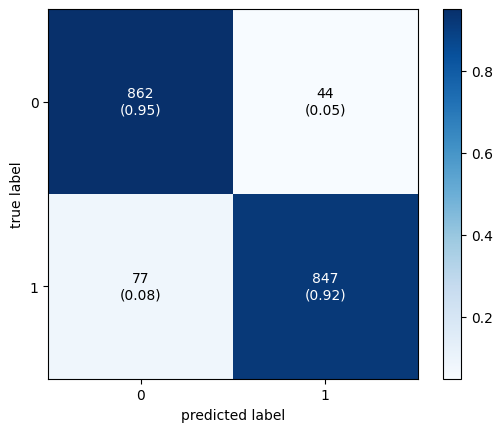

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)  # Get raw predictions
y_pred_binary = (y_pred > 0.5).astype(int)


binary1 = confusion_matrix(y_test, y_pred_binary)

fig, ax = plot_confusion_matrix(conf_mat=binary1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.utils import plot_model

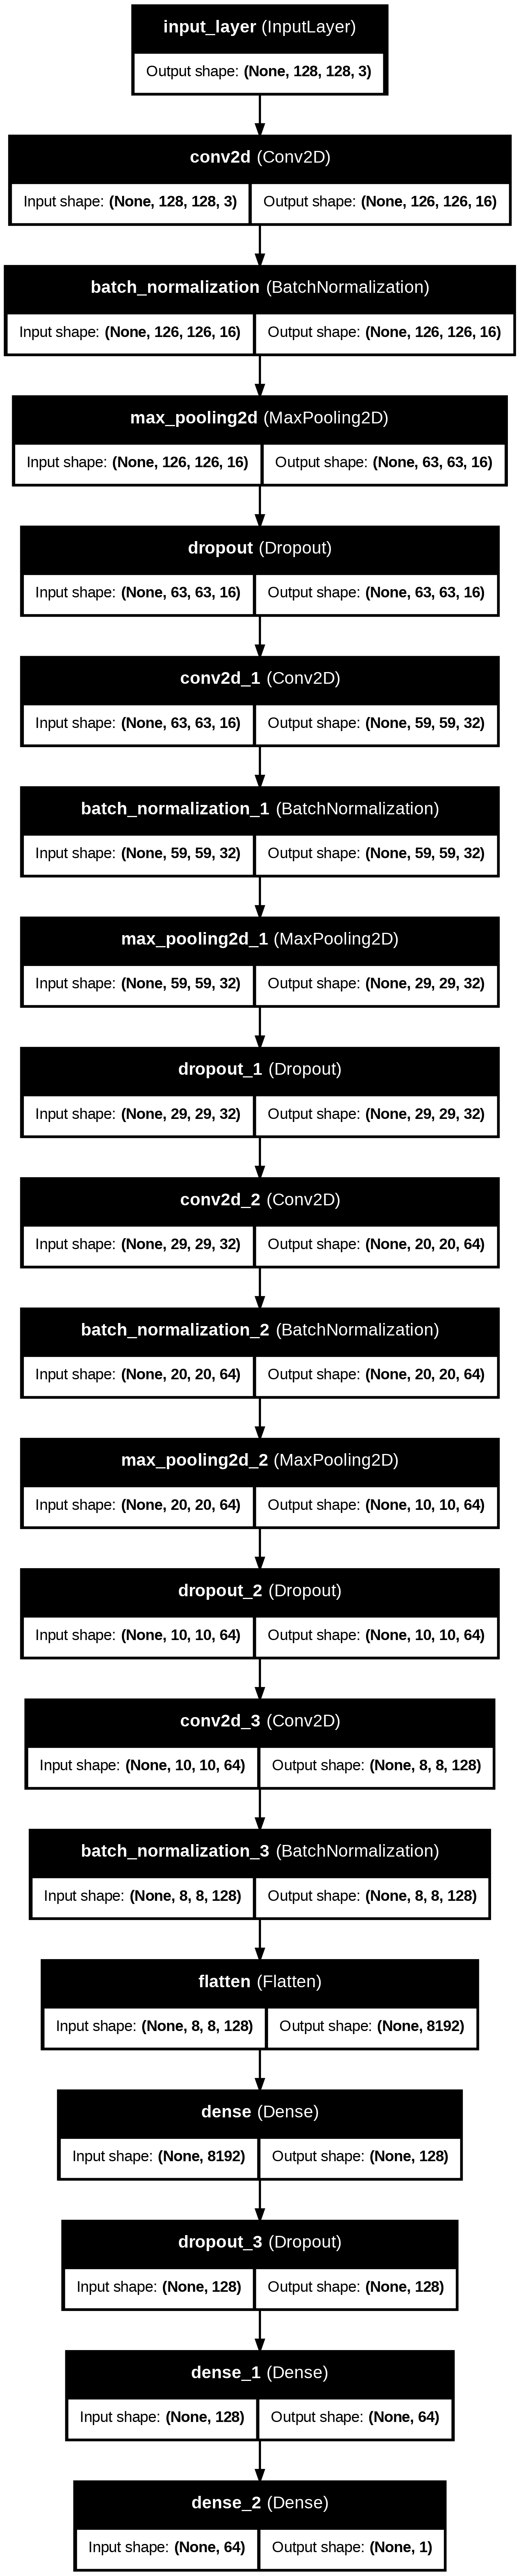

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image("model.png")

# Visualizing our CNN architecture

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 49.4 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


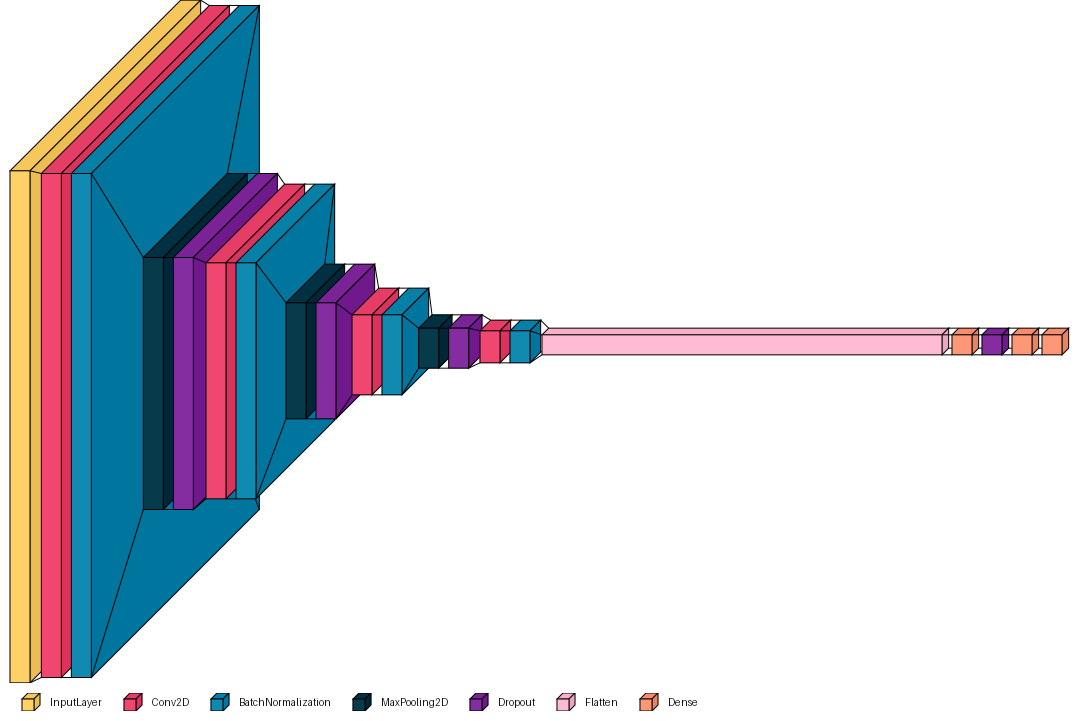

In [ ]:
!pip install visualkeras
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model,legend=True)

### Evaluiation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
Accuracy: 0.933879781420765
Precision: 0.9506172839506173
Recall: 0.9166666666666666
F1-score: 0.9333333333333333
Confusion Matrix:
[[862  44]
 [ 77 847]]
